In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### 이항분포

In [5]:
import scipy as sp

In [7]:
import scipy.stats

In [19]:
import matplotlib.font_manager as fm
font_location = "C:\\Windows\Fonts\malgunbd.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc("font", family=font_name)

Malgun Gothic


In [20]:
mpl.rcParams["font.family"]

['Malgun Gothic']

In [22]:
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
rv

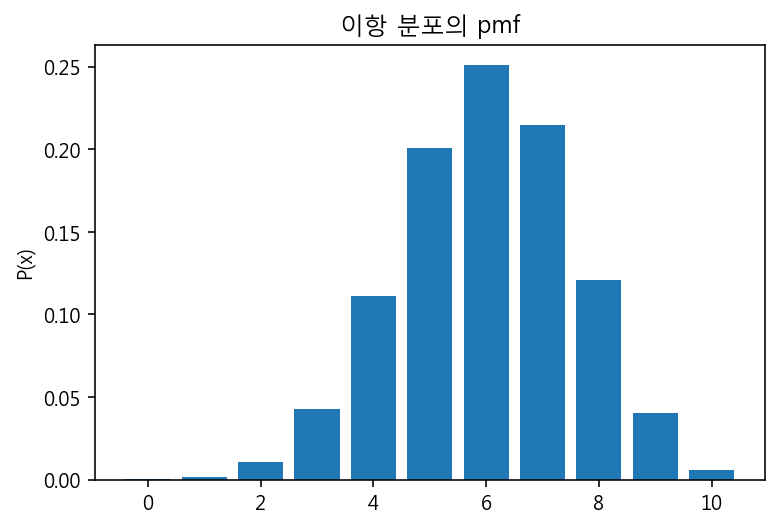

In [23]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

In [24]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

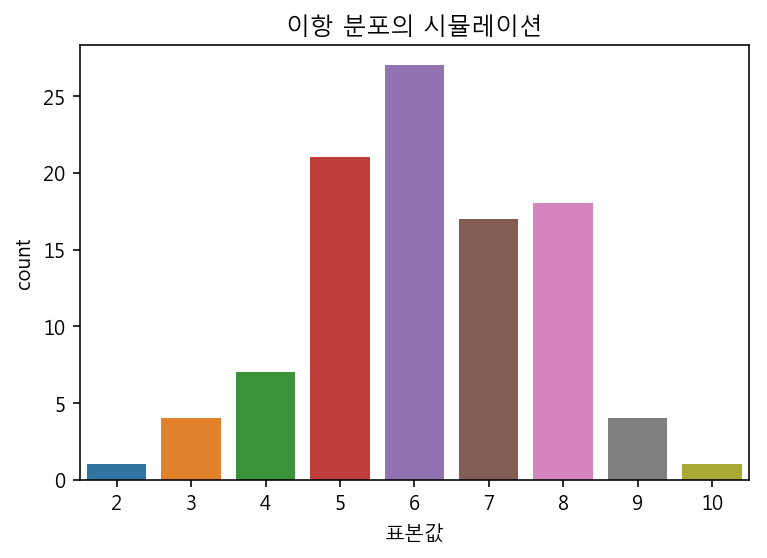

In [25]:
sns.countplot(x)
plt.title("이항 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

In [26]:
import pandas as pd

In [27]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.000000
1,0,이론,0.000105
2,1,시뮬레이션,0.000000
3,1,이론,0.001573
4,2,시뮬레이션,0.010000
5,2,이론,0.010617
6,3,시뮬레이션,0.040000
7,3,이론,0.042467
8,4,시뮬레이션,0.070000
9,4,이론,0.111477


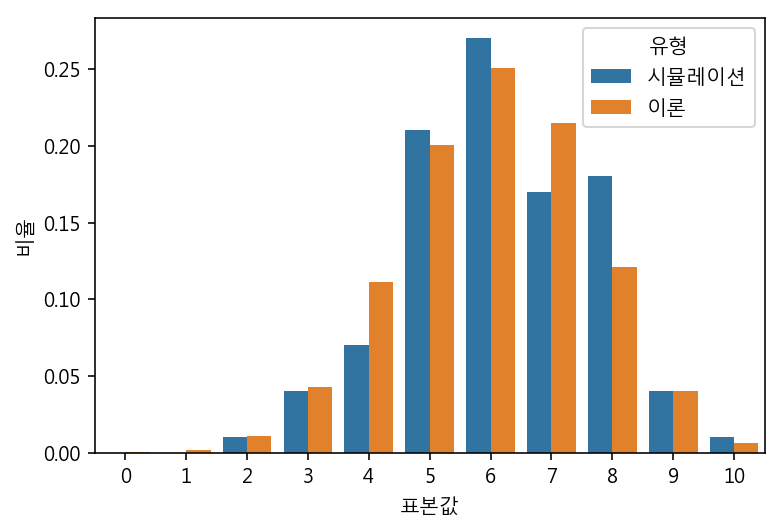

In [28]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

#### 카테고리 분포

In [29]:
theta = np.array([1/6]*6)
rv = sp.stats.multinomial(1, theta)

In [30]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


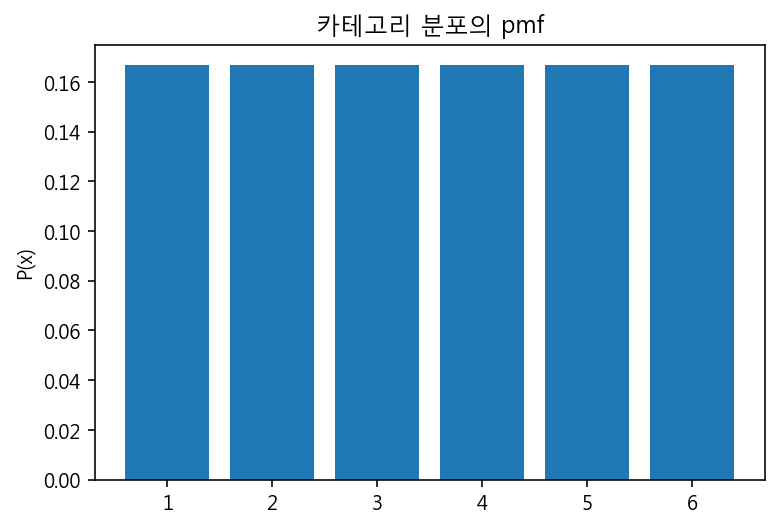

In [31]:
plt.bar(xx, rv.pmf(xx_ohe))
plt.ylabel("P(x)")
plt.title("카테고리 분포의 pmf")
plt.show()

In [32]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

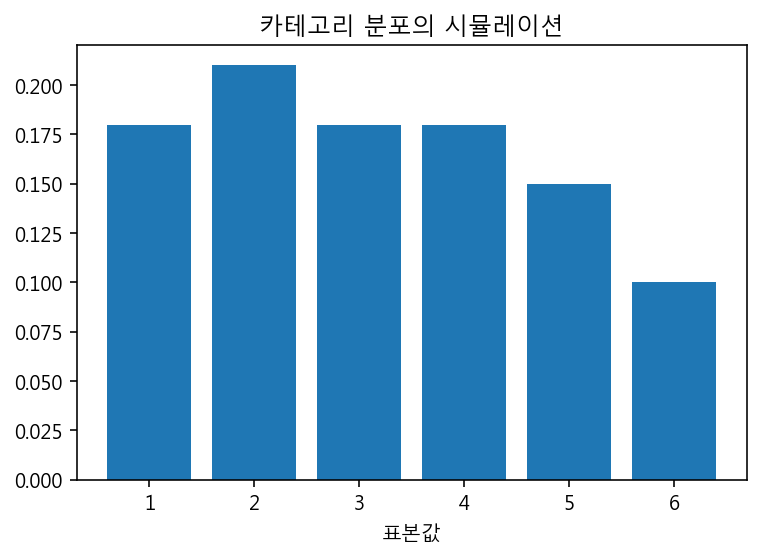

In [33]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

In [34]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe), "시뮬레이션": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,시뮬레이션,0.180000
1,1,이론,0.166667
2,2,시뮬레이션,0.210000
3,2,이론,0.166667
4,3,시뮬레이션,0.180000
5,3,이론,0.166667
6,4,시뮬레이션,0.180000
7,4,이론,0.166667
8,5,시뮬레이션,0.150000
9,5,이론,0.166667


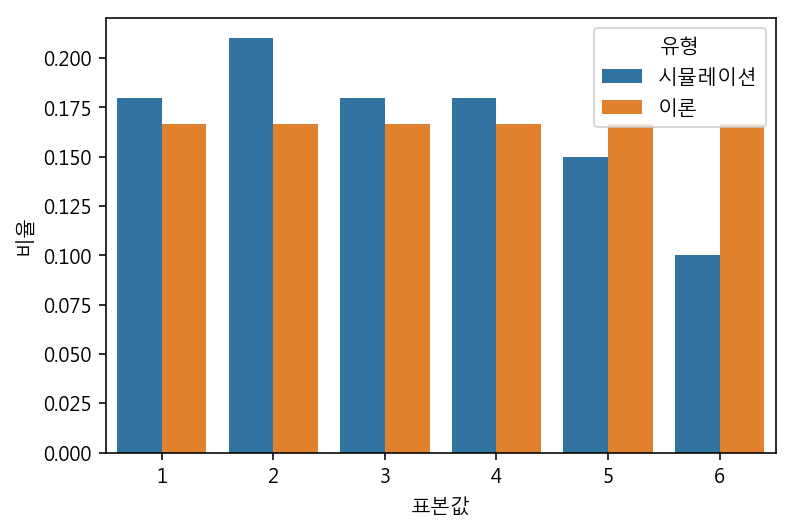

In [35]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

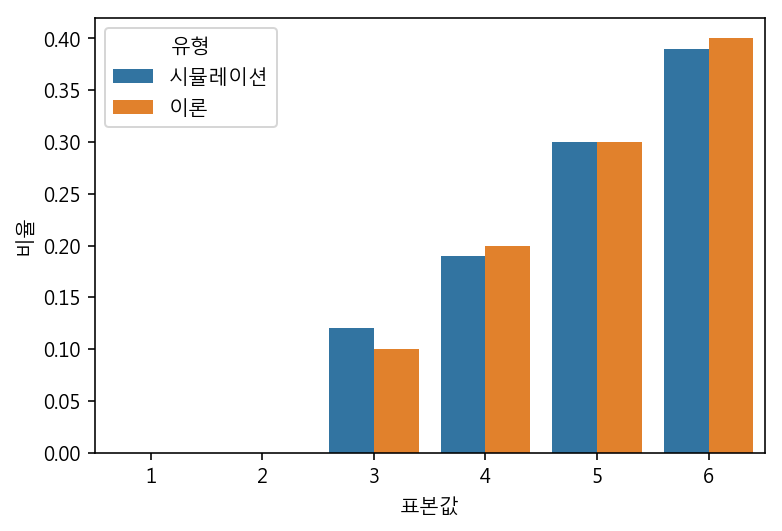

In [36]:
eps = np.finfo(np.float).eps
theta = np.array([eps, eps, 0.1, 0.2, 0.3, 0.4])
rv = sp.stats.multinomial(1, theta)

X = rv.rvs(100, random_state=1)
y = X.sum(axis=0) / float(len(X))

df = pd.DataFrame({"이론": rv.pmf(xx_ohe), "시뮬레이션": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

#### 다항분포

In [37]:
N = 30
theta = [0, 0, 0.1, 0.2, 0.3, 0.4]
rv = sp.stats.multinomial(N, theta)

In [38]:
np.random.seed(0)
X = rv.rvs(100)
X[:5]

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

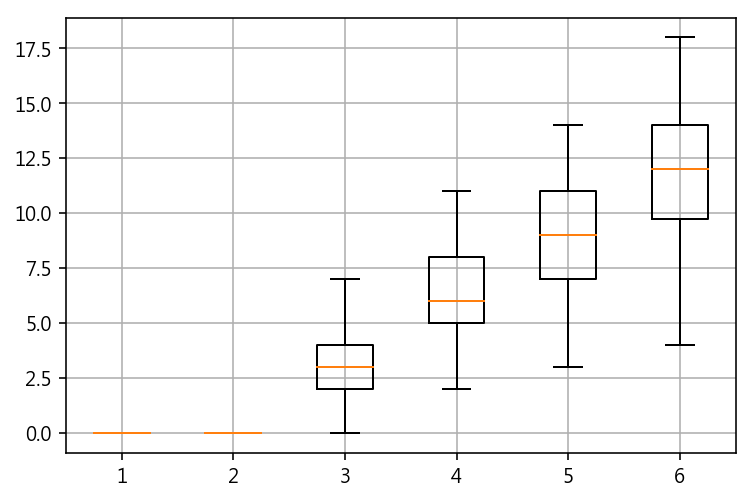

In [39]:
plt.boxplot(X)
plt.grid(True)
plt.show()

In [40]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df.tail()

,trial,class,binomial
595,99,1,0
596,99,2,2
597,99,3,5
598,99,4,10
599,99,5,13


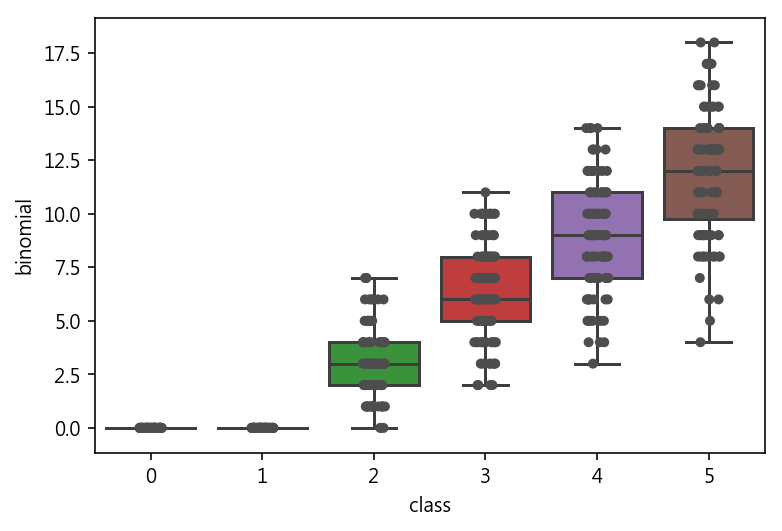

In [41]:
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()
# jitter

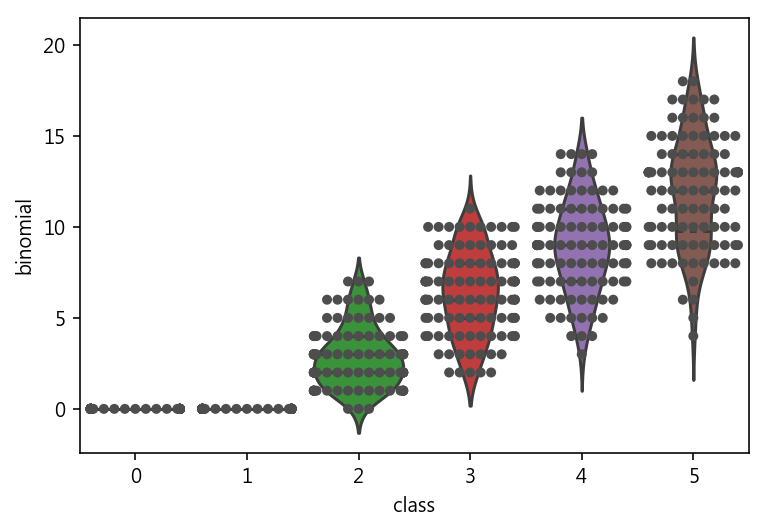

In [42]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.swarmplot(x="class", y="binomial", data=df, color=".3")
plt.show()
# 세로로 자르면 히스토그램임. 얘는 점을 밀어낸 거(포도송이처럼)

#### 가우시안 정규 분포

In [46]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

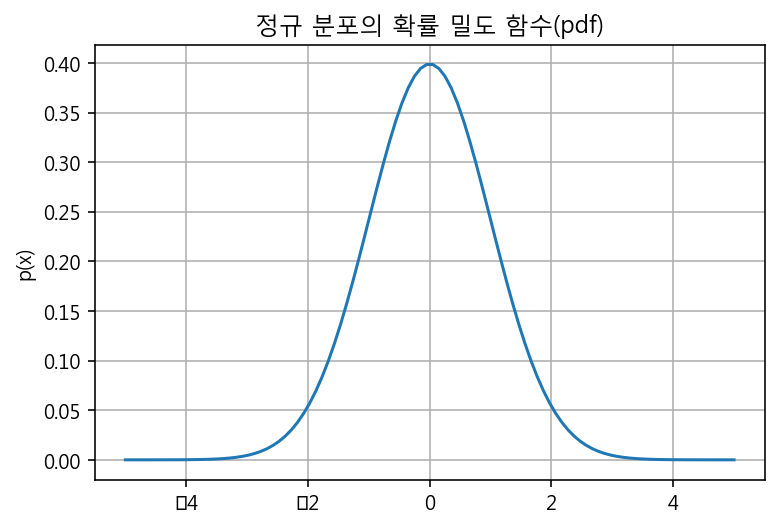

In [48]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("정규 분포의 확률 밀도 함수(pdf)")
plt.grid(True)
plt.show()

In [49]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

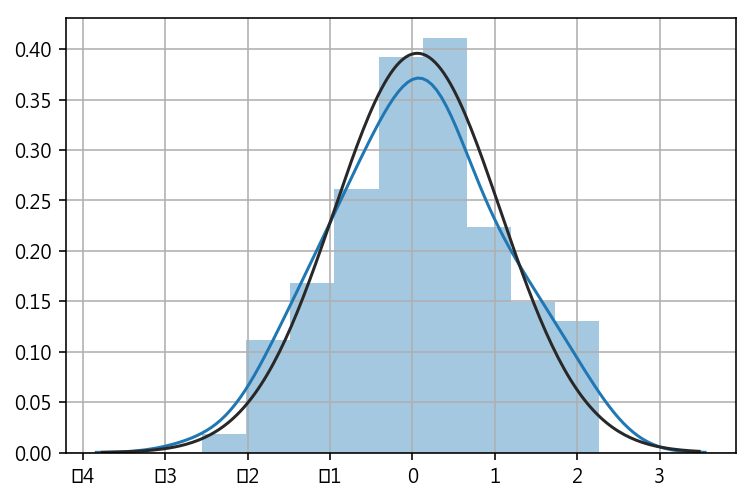

In [50]:
sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.grid(True)
plt.show()

#### Q-Q 플롯

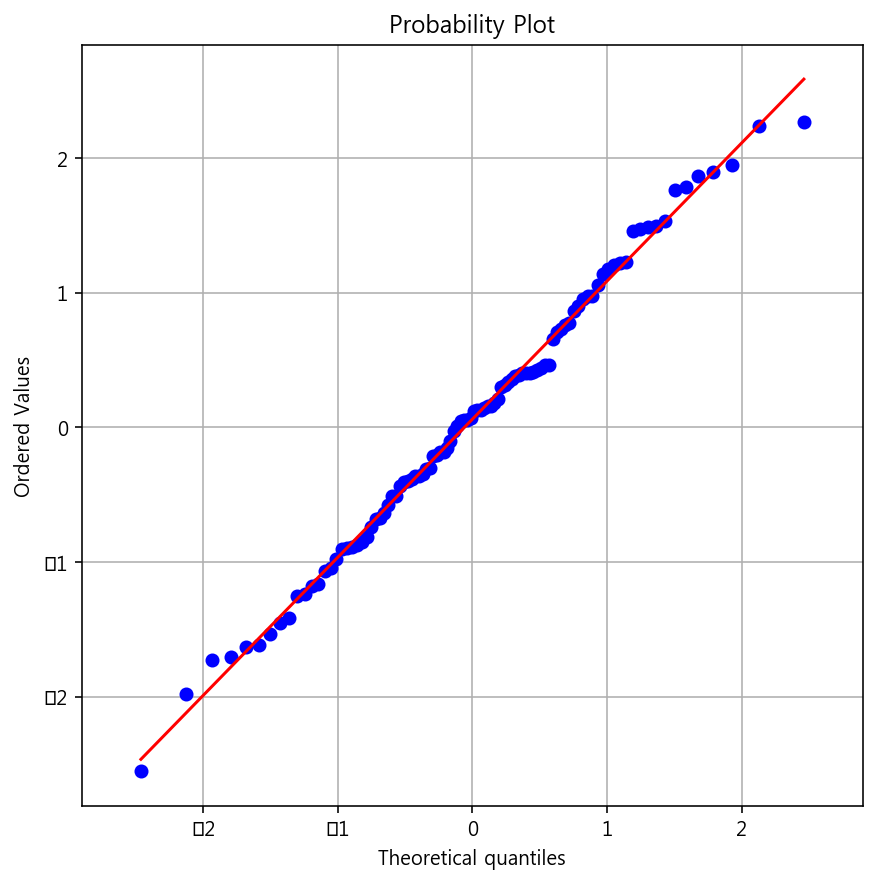

In [44]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.grid(True)
plt.show()

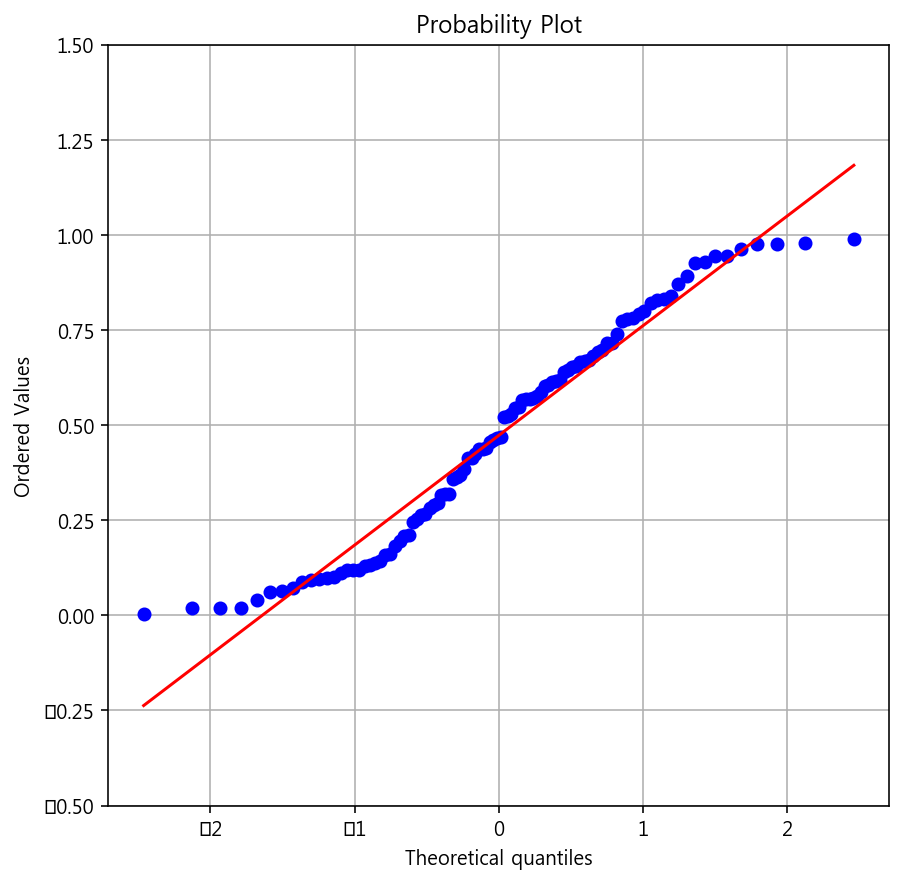

In [45]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()

#### 중심 극한 정리(Central Limit Theorem)

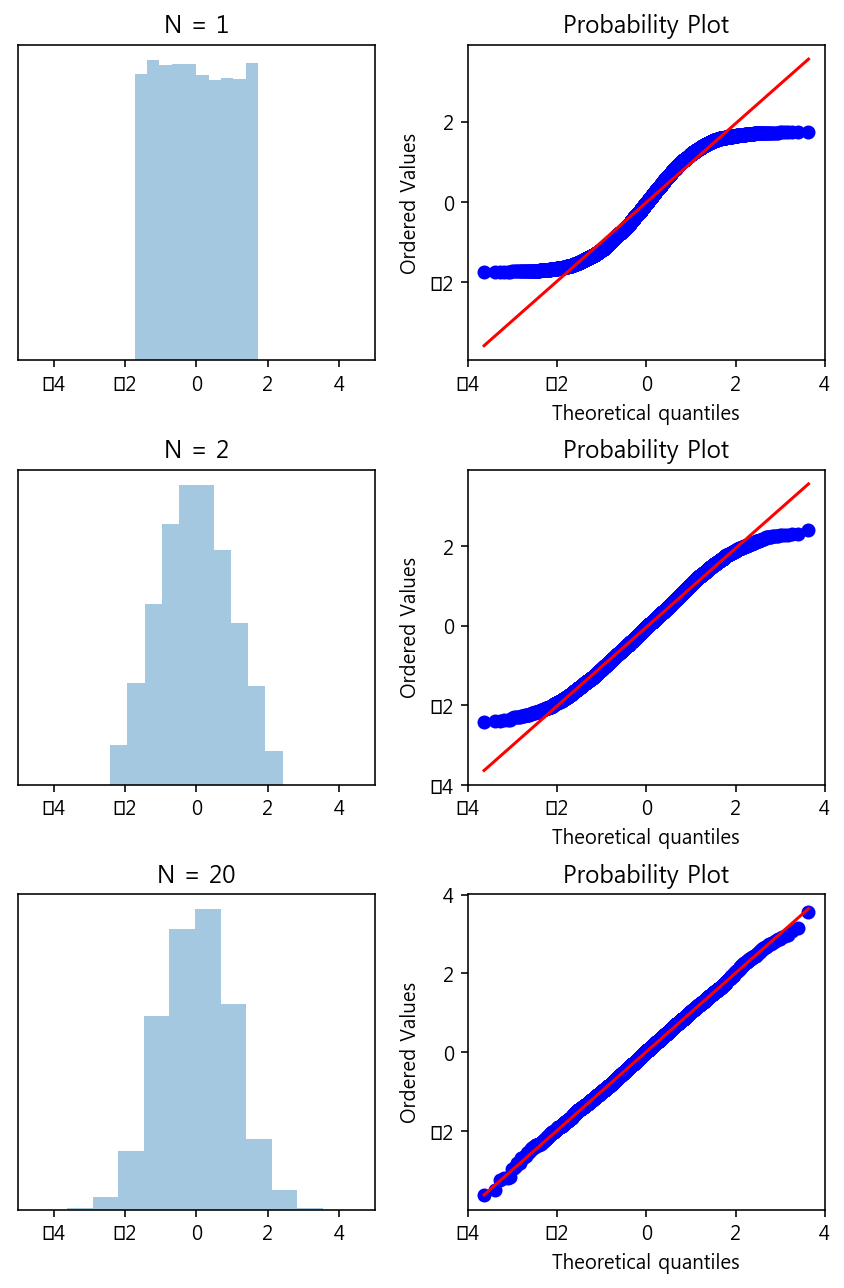

In [51]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 20]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

#### Fat tail 현상

#### 스튜던트 t 분포

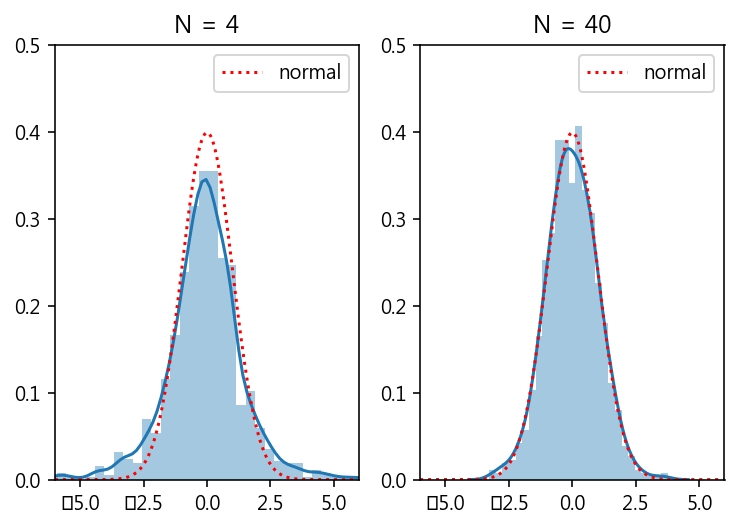

In [55]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 4")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 40")
plt.legend()

plt.show()